1. Implement a top-down and iterative apporach to the Knapsack problem, then validate that the algorithm works for any prolem instance.

In [ ]:
import numpy as np

In [ ]:
# DP Bottom Up Approach
def DPKnapsack( W, Values, Weights):
  n = len(Values)
  F = np.zeros((n+1, W + 1))

  for i in range(1,n + 1):
    #index of the largest item we are thinking of adding to the knapsack
    for j in range(1,W+1):
      if i == 0 or j == 0:
        F[i][j] = 0
      #check adding each item at a given weight
      if Weights[i-1]>j:
        #can't add an item to the knapsack, it's too heavy!
        F[i][j] = F[i-1][j]
      else:
        #choose to walk away with the most profit given the circumstance
        F[i][j] = max(F[i-1][j], (F[i-1][j-Weights[i-1]] + Values[i-1]))
  return F[n][W]


In [ ]:
#validate DP method

#in-class example
values = [42,12,40,25]
weights = [7,3,4,5]
capacity = 10
print("DP Knapsack in-class validation example (expected answer 65): " + str(DPKnapsack(capacity, values, weights)))


# no items fit in the knapsack
values2 = [100,200,300]
weights2 = [100,200,300]
result2 = DPKnapsack(10, values2, weights2)
print("DP knapsack result nothing fits into the knapsack (expected answer 0): " + str(result2))
#this makes sense, you can take nothing


# all weights are 0, s everything fits in the knapsack
values3 = [100, 200, 300]
weights3 = [0,0,0]
result3 = DPKnapsack(4, values3, weights3)
print("DP knapsack result everything fits into the knapsack (expected answer sum of all values 100 + 200 + 300): " + str(result3))


# all the values are zero
values4 = [0,0,0]
weights4 = [100,200,300]
result4 = DPKnapsack(100, values4, weights4)
print("DP knapsack result all valuesa are zero (expected result is 0): " + str(result4))


DP Knapsack in-class validation example (expected answer 65): 65.0
DP knapsack result nothing fits into the knapsack (expected answer 0): 0.0
DP knapsack result everything fits into the knapsack (expected answer sum of all values 100 + 200 + 300): 600.0
DP knapsack result all valuesa are zero (expected result is 0): 0.0


Set Resources:

Q: What is a set?
https://www.w3schools.com/python/python_sets.asp


Q: What are set basics?
https://www.datacamp.com/tutorial/sets-in-python


In [ ]:
import numpy as np

def IterativeMemoKnapsack(W, Values, Weights):
  n = len(Values)
  # memoization table F
  F = np.zeros((n + 1, W + 1), dtype=int)

  # stack dictionary to store sub-problems starting at the actual problem we want to solve
  stack = {(n, W): 1}
  processed_keys = set()
  to_process_keys = set(stack.keys())

  while to_process_keys:
    # take one of the keys that needs to be processed
    key = to_process_keys.pop()

    # add new valid sub-problems
    if key[0] > 0:  # check if n is greater than 0 to avoid array index out of bounds error I can't solve otherwise
      # add the problem to the left of the given problem in matrix F
      new_key1 = (key[0] - 1, key[1])
      if new_key1 not in processed_keys:
          #add a to-do to the queue
          to_process_keys.add(new_key1)
      # sub-problem added to stack
      stack[new_key1] = 1
      if key[1] >= Weights[key[0] - 1]:
        # if the current knapsack capacity is greater than or equal to the weight of the item we are considering adding,
        # add it to the problem along with it's corresponding weight
        new_key2 = (key[0] - 1, key[1] - Weights[key[0] - 1])
        stack[new_key2] = 1
        # add the new keys to the to_process_keys if they haven't been processed
        if new_key2 not in processed_keys:
          to_process_keys.add(new_key2)

      # Mark the key as processed
      processed_keys.add(key)

  #sort stack to go top-down of matrix F
  sorted_stack = {k : stack[k] for k in sorted(stack)}

  for i,j in sorted_stack.keys():
    if (i-1) >= 0: # protect against idexing out of bounds which in python will just loop to back of list
      if Weights[i-1] > j:
        #do we not have room for the current item at our current capacity?
        #if not, don't include it
        F[i][j] = F[i - 1][j]
      else:
        #otherwise, calculate including the current value into our sum matrix F to walk away with the most profit based on prior decisions
        F[i][j] = max(F[i - 1][j], (F[i - 1][j - Weights[i-1]] + Values[i - 1]))
  # The result is stored in F[n][W]
  return F[n][W]



In [ ]:
#validate Memoization method

values = [42,12,40,25]
weights = [7,3,4,5]
capacity = 10
print("Check memo-iterative approach in-class example (expected answer 65): " + str(IterativeMemoKnapsack(capacity, values, weights)))

#End-Case checks:
W = 3
Weights = [100,200,300]
Values = [100, 200, 300]

# no items fit in the knapsack
result = IterativeMemoKnapsack(W, Values,Weights)
print("Iterative memo knapsack result nothing fits into the knapsack (expected result 0): " + str(result))
#this makes sense, you can take nothing

# all weights are 0, s everything fits in the knapsack
Weights = [0,0,0]
result = IterativeMemoKnapsack(W, Values, Weights)
print("DP knapsack result everything fits into the knapsack (expected result 100 + 200 + 300): " + str(result))

# all the values are zero
Weights = [100,200,300]
Values = [0,0,0]
result = IterativeMemoKnapsack(W, Values, Weights)
print("DP knapsack result all values are zero (expected result 0): " + str(result))


Check memo-iterative approach in-class example (expected answer 65): 65
Iterative memo knapsack result nothing fits into the knapsack (expected result 0): 0
DP knapsack result everything fits into the knapsack (expected result 100 + 200 + 300): 600
DP knapsack result all values are zero (expected result 0): 0


2. Compare the performance of your two algorithms on random inputs. Generate inputs with random item weigts and values. Generate plots to show runtimes with respect to n and plots which show runtime with respect to W (for a fixed n). Let n and W be as larger as you need them to be to show a performance difference between the two algorithms. Is the performance gap biggen when n is large or when W is large?

First: a fixed W (let's say 100) and variable sizes of n.

In [ ]:
import random
import time
import numpy as np

# Generate random inputs for trials
n_sizes = [1000*i for i in range(1,11)] #pick values in regard to linear time, pick max n and linearly space end points

weight_data_sets = []
value_data_sets = []
#generate 10 arrays of different sizes of n
for size in n_sizes:
  weight_data_sets.append([[random.randint(1, size) for _ in range(size)]for j in range(10)])
  value_data_sets.append([[random.randint(1, size) for _ in range(size)] for j in range(10)])

#finished generating data sets

#track runtime of each algorithm
runtime_tracker_dp = np.zeros((10, len(n_sizes))) # ten copies of each size, four size
runtime_tracker_memo = np.zeros((10, len(n_sizes))) # ten copies of each size, four size

W = 100
#now, index through the data sets
for j,n in enumerate(n_sizes):
  for i in range(10):
    curr_weights = weight_data_sets[j][i]
    curr_values = value_data_sets[j][i]
    # for DP
    start_time = time.time_ns()
    _ = DPKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_tracker_dp[i][j] = end_time - start_time

    #for memo
    start_time = time.time_ns()
    _ = IterativeMemoKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_tracker_memo[i][j] = end_time - start_time

#calculate the average across the samples
average_runtime_dp = np.mean(runtime_tracker_dp, axis=0)
average_runtime_memo = np.mean(runtime_tracker_memo, axis= 0)

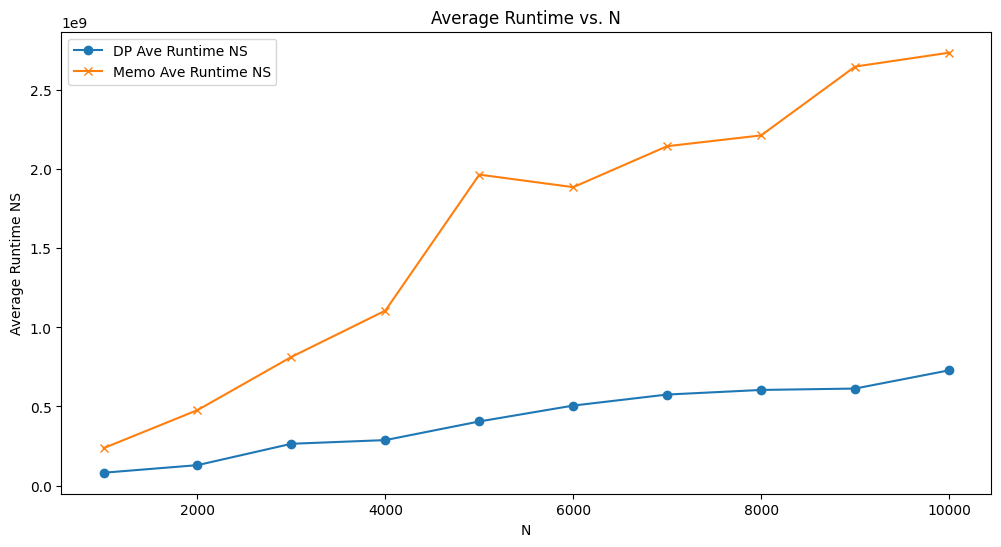

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(n_sizes, average_runtime_dp, label='DP Ave Runtime NS', marker='o')
plt.plot(n_sizes, average_runtime_memo, label="Memo Ave Runtime NS", marker = 'x')
plt.xlabel('N')
plt.ylabel('Average Runtime NS')
plt.title('Average Runtime vs. N')
plt.legend()

Here, as expected we see that, holding weight constant, that runtime increases with respect to N apparently linearly. My iterative memoization function actually runs worse than the DP algorithm runtime on average. This could be due to the fact that, in it's worst-case scenario, the Memoization solution performs as bad as DP does all the time. It could also be due to the fact that the use of three additional data structures within the function adds overhead cost to the function. The call to the sort method on the stack could also influence runtime. The added flow-control complexity of IterativeMemoKnapsack could also influence runtime. Now, let's experiment with changing to holding N constant and calculating runtime.

In [ ]:
#choosing n constant value = 1,000
value_subset = value_data_sets[0]
weight_subset = weight_data_sets[0]
# Let's assume you want to test capacities at 10%, 20%, ..., 100% of total possible weight

Weights = [int(i*100) for i in range(2, 22)]

runtime_dp_tracker_weights = np.zeros((len(value_subset),len(Weights)))
runtime_memo_tracker_weights = np.zeros((len(value_subset),len(Weights)))



for j, W in enumerate(Weights):
  for i in range(10):
    curr_values = value_subset[i]
    curr_weights = weight_subset[i]

    start_time = time.time_ns()
    _ = DPKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_dp_tracker_weights[i][j] = end_time - start_time

    start_time = time.time_ns()
    _ = IterativeMemoKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_memo_tracker_weights[i][j] = end_time - start_time

average_runtime_dp_W = np.mean(runtime_dp_tracker_weights, axis=0)
average_runtime_memo_W = np.mean(runtime_memo_tracker_weights, axis = 0)

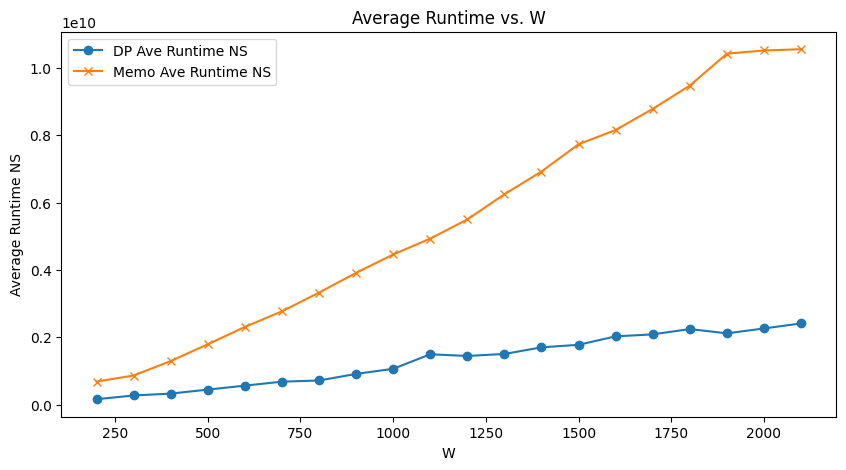

In [ ]:
#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Weights, average_runtime_dp_W, label='DP Ave Runtime NS', marker='o')
plt.plot(Weights, average_runtime_memo_W, label="Memo Ave Runtime NS", marker = 'x')
plt.xlabel('W')
plt.ylabel('Average Runtime NS')
plt.title('Average Runtime vs. W')
plt.legend()

Here, we see that as W increases that it appears linear. Again, here we see that the memoization function has a longer average runtime than the DP algorithm which could be due to the cited issues above.




3. Compare the performance of your algorithms on special inputs. Now, craft inputs where all weights are relatively low (1< weight < 10). Re-run the algorithm comparisons. Has the performance gap changed in any interesting way?

Plot the time performance of your algorithm as a function os n and W for each algorithm on special inputs, and discussion about the reasons for any performance differences between the two algorithms.

First, hold W constant at 10 n of different sizes:

In [ ]:
#finished generating data sets
runtime_tracker_dp = np.zeros((10, len(n_sizes))) # ten copies of each size, four size
runtime_tracker_memo = np.zeros((10, len(n_sizes))) # ten copies of each size, four size

W = 10
#now, index through the data sets
for j,n in enumerate(n_sizes):
  for i in range(10):
    curr_weights = weight_data_sets[j][i]
    curr_values = value_data_sets[j][i]
    # for DP
    start_time = time.time_ns()
    _ = DPKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_tracker_dp[i][j] = end_time - start_time

    #for memo
    start_time = time.time_ns()
    _ = IterativeMemoKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_tracker_memo[i][j] = end_time - start_time

#calculate the average across the samples
average_runtime_dp = np.mean(runtime_tracker_dp, axis=0)
average_runtime_memo = np.mean(runtime_tracker_memo, axis= 0)

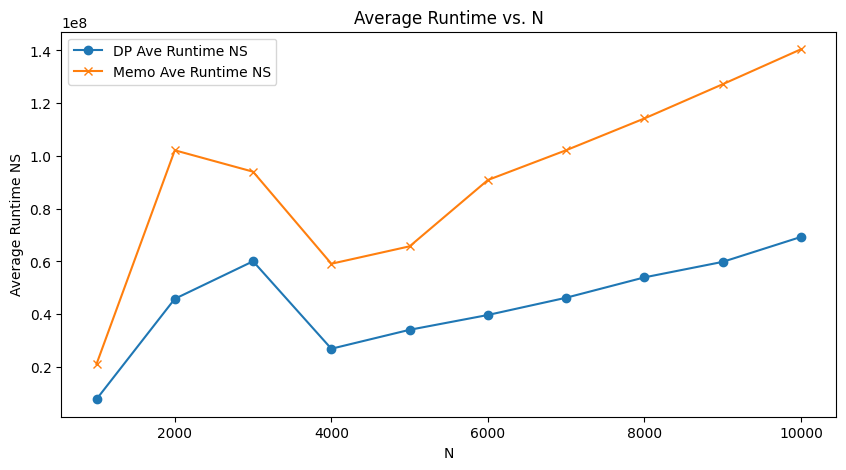

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(n_sizes, average_runtime_dp, label='DP Ave Runtime NS', marker='o')
plt.plot(n_sizes, average_runtime_memo, label="Memo Ave Runtime NS", marker = 'x')
plt.xlabel('N')
plt.ylabel('Average Runtime NS')
plt.title('Average Runtime vs. N')
plt.legend()

We see that there's a spike where runtime is more inefficient compared to in the beginning and a trough where the runtime "levels out" and continues on it's previous linear trajectory. This could be due to input randomization. This also may be an issue in regards to inputs of values and weights at these different processing values of n randomized, but otherwise the functions appear to behave linearly with the Memoization approach running on average poorer than the DP approach. Due to the added complexities in flow-control, data structures, sorting, and memory allocation (issues with the sets/stack).

Now, let's iterate over different sizes of W from 1 to 10 holding n constant at 1000.

In [ ]:
#choosing n constant value = 1,000
value_subset = value_data_sets[0]
weight_subset = weight_data_sets[0]
# Let's assume you want to test capacities at 10%, 20%, ..., 100% of total possible weight

Weights = [i for i in range(1,11)]

runtime_dp_tracker_weights = np.zeros((len(value_subset),len(Weights)))
runtime_memo_tracker_weights = np.zeros((len(value_subset),len(Weights)))



for j, W in enumerate(Weights):
  for i in range(10):
    curr_values = value_subset[i]
    curr_weights = weight_subset[i]

    start_time = time.time_ns()
    _ = DPKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_dp_tracker_weights[i][j] = end_time - start_time

    start_time = time.time_ns()
    _ = IterativeMemoKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_memo_tracker_weights[i][j] = end_time - start_time

average_runtime_dp_W = np.mean(runtime_dp_tracker_weights, axis=0)
average_runtime_memo_W = np.mean(runtime_memo_tracker_weights, axis = 0)

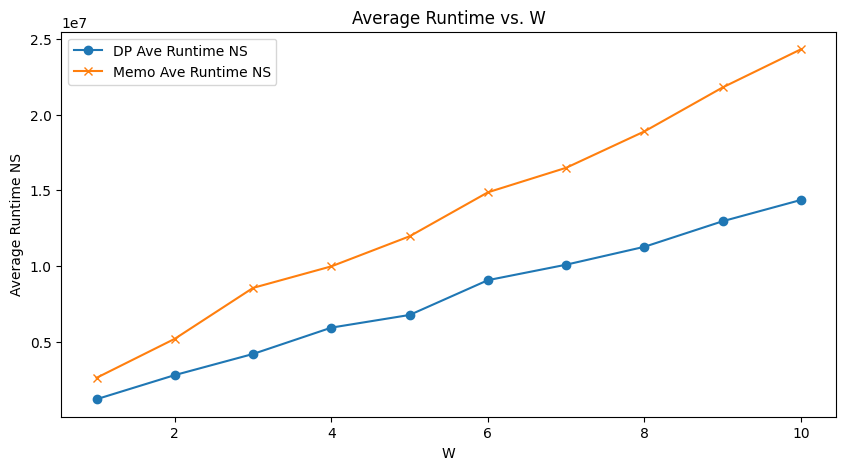

In [ ]:
#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(Weights, average_runtime_dp_W, label='DP Ave Runtime NS', marker='o')
plt.plot(Weights, average_runtime_memo_W, label="Memo Ave Runtime NS", marker = 'x')
plt.xlabel('W')
plt.ylabel('Average Runtime NS')
plt.title('Average Runtime vs. W')
plt.legend()

We see linear behavior here as well with the memoization method having a higher level of runtime than DP which could be due to the reasons cited above.

4. Illustrate that this is a pseudopolynomial-time algorithm. That is: it is polynomial in the value of W but not the size representation of W --what does this mean?

I THINK We can try to capture the pseudo-polynomial behavior by plotting W as the number of bits occupied across one size of n that is plotting powers of 2.

In [ ]:
import math
#choosing n constant value = 1,000
value_subset = value_data_sets[0]
weight_subset = weight_data_sets[0]

Weights = [2**i for i in range(10)]

runtime_dp_tracker_weights = np.zeros((len(value_subset),len(Weights)))
runtime_memo_tracker_weights = np.zeros((len(value_subset),len(Weights)))

for j, W in enumerate(Weights):
  for i in range(10):
    curr_values = value_subset[i]
    curr_weights = weight_subset[i]

    start_time = time.time_ns()
    _ = DPKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_dp_tracker_weights[i][j] = end_time - start_time

    start_time = time.time_ns()
    _ = IterativeMemoKnapsack(W, curr_values, curr_weights)
    end_time = time.time_ns()
    runtime_memo_tracker_weights[i][j] = end_time - start_time

average_runtime_dp_W = np.mean(runtime_dp_tracker_weights, axis=0)
average_runtime_memo_W = np.mean(runtime_memo_tracker_weights, axis = 0)

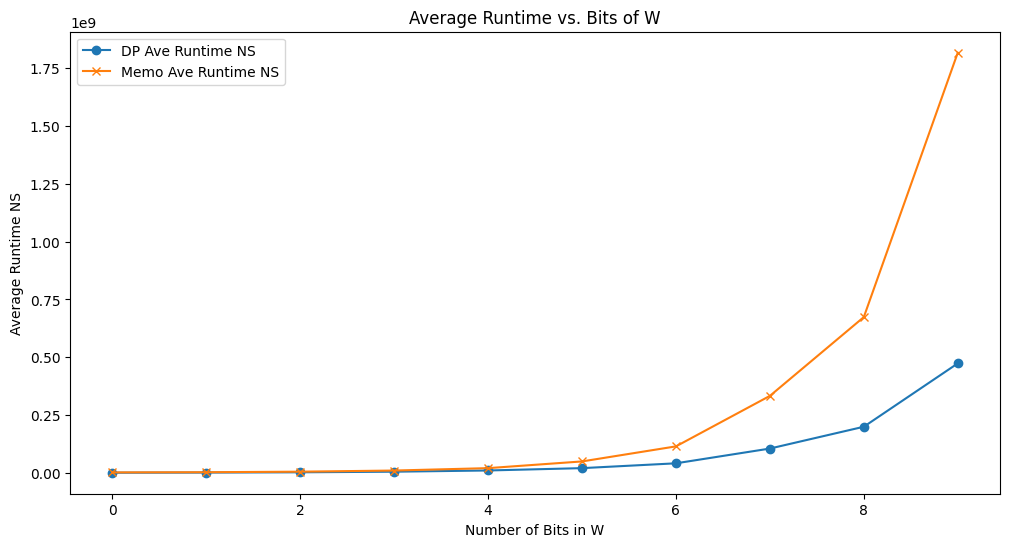

In [ ]:
#plotting
import matplotlib.pyplot as plt

bits_for_weights = [i for i in range(10)]
plt.figure(figsize=(12,6))
plt.plot(bits_for_weights, average_runtime_dp_W, label='DP Ave Runtime NS', marker='o')
plt.plot(bits_for_weights, average_runtime_memo_W, label="Memo Ave Runtime NS", marker = 'x')
plt.xlabel('Number of Bits in W')
plt.ylabel('Average Runtime NS')
plt.title('Average Runtime vs. Bits of W')
plt.legend()

It is apparent that the number of bits of W needed to occupy space increases exponentially as W grows. Here though, it appears that the memoization function and the DP function have the same runtime and diverge as the number of bits of W increases around 4 - a different finding than in deliverables 2 and 3. It is possible that I didn't plot small enough n's and W's to see this performance similarity. Something to experiment with on the side most definitely. This will be included in a separate document.